### Comparação de Técnicas de Reamostragem em Dados Desbalanceados

In [1]:
# Imports Necessários
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import warnings
warnings.filterwarnings("ignore")

##### DataSet

Dados retirados do site UCI - Machine Learning Repository: [default of credit card clientes Data Set](https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients).

In [2]:
df = pd.read_excel('./Dados/default of credit card clients.xls')

print(f'Total de Registros: {df.shape[0]}, total de colunas: {df.shape[1]}.')

# Deletando coluna ID
df = df.drop(columns = 'ID')

# Apresentação de algumas observações
df.sample(3)

Total de Registros: 30000, total de colunas: 25.


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
15392,50000,2,3,1,53,0,0,0,0,0,...,50593,20218,20645,1770,2009,2593,1000,752,1017,1
3397,40000,2,2,1,45,1,2,0,0,0,...,12241,12544,12835,0,1200,500,500,500,500,1
13373,50000,2,1,2,28,0,0,0,0,0,...,10142,10174,9904,2406,2000,462,736,0,147,0


* **Definições das variáveis (1 variável resposta e 23 variáveis explicativas).**

    - Y: pesquisa com dados binários - pagamento Yes - 1 .. No - 0.. como resposta binária. 
    
    - X1: Quantidade de crédito dado (em dolar) - inclue tanto crédito do consumidor individual como crédito familiar. 
    - X2: Gênero  (1 - masculino, 2 - femenino). 
    - X3: Educação (1 - graduate school, 2 - universidade, 3 - high school, 4 outros).
    - X4: Status Civil (1 - casado, 2 - solteiro, 3 - outros).
    - X5: Idade em ano.  
    - X6: status de reembolso setembro de 2005 (Hitórico de pagamento).
    - X7: status de reembolso agosto de 2005 (Hitórico de pagamento).
    - X8: status de reembolso julho de 2005 (Hitórico de pagamento).
    - X9: status de reembolso junho de 2005 (Hitórico de pagamento).
    - X10: status de reembolso maio de 2005 (Hitórico de pagamento).
    - X11: status de reembolso abril de 2005 (Hitórico de pagamento).
        - Hitórico de pagamento: Mensuração de pagamento é: -1 - pago devidamente, 1 - pago com um mês de atraso, <br /> 2 - pago com dois meses de atraso, 8 - pago com oito meses de atraso, 9 - pago com 9 ou mais mes de atraso.
        <br /> <br />
    - X12: valor da fatura em dólar - setembro de 2005
    - X13: valor da fatura em dólar - agosto de 2005
    - X14: valor da fatura em dólar - julho de 2005
    - X15: valor da fatura em dólar - junho de 2005
    - X16: valor da fatura em dólar - maio de 2005
    - X17: valor da fatura em dólar - abril de 2005
    - X18: valor pago em dólar - setembro de 2005
    - X19: valor pago em dólar - agosto de 2005
    - X20: valor pago em dólar - julho de 2005
    - X21: valor pago em dólar - junho de 2005
    - X22: valor pago em dólar - maio de 2005
    - X23: valor pago em dólar - abril de 2005

**Definindo os tipos de variáveis**

In [3]:
# informações da Base de Dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   X1      30000 non-null  int64
 1   X2      30000 non-null  int64
 2   X3      30000 non-null  int64
 3   X4      30000 non-null  int64
 4   X5      30000 non-null  int64
 5   X6      30000 non-null  int64
 6   X7      30000 non-null  int64
 7   X8      30000 non-null  int64
 8   X9      30000 non-null  int64
 9   X10     30000 non-null  int64
 10  X11     30000 non-null  int64
 11  X12     30000 non-null  int64
 12  X13     30000 non-null  int64
 13  X14     30000 non-null  int64
 14  X15     30000 non-null  int64
 15  X16     30000 non-null  int64
 16  X17     30000 non-null  int64
 17  X18     30000 non-null  int64
 18  X19     30000 non-null  int64
 19  X20     30000 non-null  int64
 20  X21     30000 non-null  int64
 21  X22     30000 non-null  int64
 22  X23     30000 non-null  int64
 23  Y       300

In [4]:
"""# Transformação em Variáveis Categoricas
df['Y'] = df['Y'].astype('object')
df['X2'] = df['X2'].astype('object')
df['X3'] = df['X3'].astype('object')
df['X4'] = df['X4'].astype('object')
df['X6'] = df['X6'].astype('object')
df['X7'] = df['X7'].astype('object')
df['X8'] = df['X8'].astype('object')
df['X9'] = df['X9'].astype('object')
df['X10'] = df['X10'].astype('object')
df['X11'] = df['X11'].astype('object')"""

"# Transformação em Variáveis Categoricas\ndf['Y'] = df['Y'].astype('object')\ndf['X2'] = df['X2'].astype('object')\ndf['X3'] = df['X3'].astype('object')\ndf['X4'] = df['X4'].astype('object')\ndf['X6'] = df['X6'].astype('object')\ndf['X7'] = df['X7'].astype('object')\ndf['X8'] = df['X8'].astype('object')\ndf['X9'] = df['X9'].astype('object')\ndf['X10'] = df['X10'].astype('object')\ndf['X11'] = df['X11'].astype('object')"

**Análise Descritiva com ETL**

1 - Verificação dos valores (encontrar incoerencia de resultados e digitações equivocados)

Categóricas

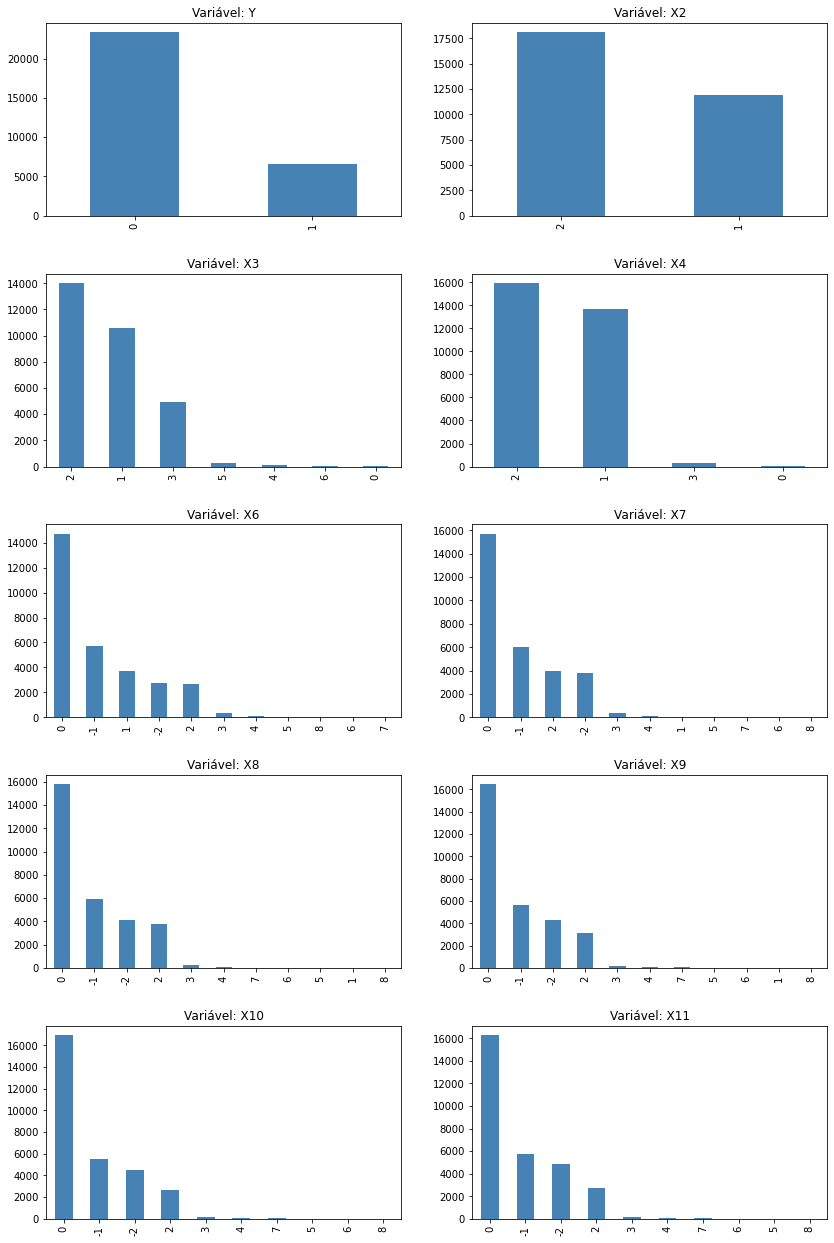

In [5]:
fig, axes = plt.subplots(5, 2, figsize=(14, 22))
plt.subplots_adjust(hspace= 0.3)

categorias = ['Y', 'X2','X3','X4','X6','X7','X8','X9','X10','X11']

h = 0
j = 0
while j < len(categorias)/2:

  df[categorias[h]].value_counts().plot.bar(color = 'steelblue', title = f'Variável: {categorias[h]}', ax = axes[j, 0])
  h += 1

  df[categorias[h]].value_counts().plot.bar(color = 'steelblue', title = f'Variável: {categorias[h]}', ax = axes[j, 1])
  j += 1
  h += 1

Numéricas

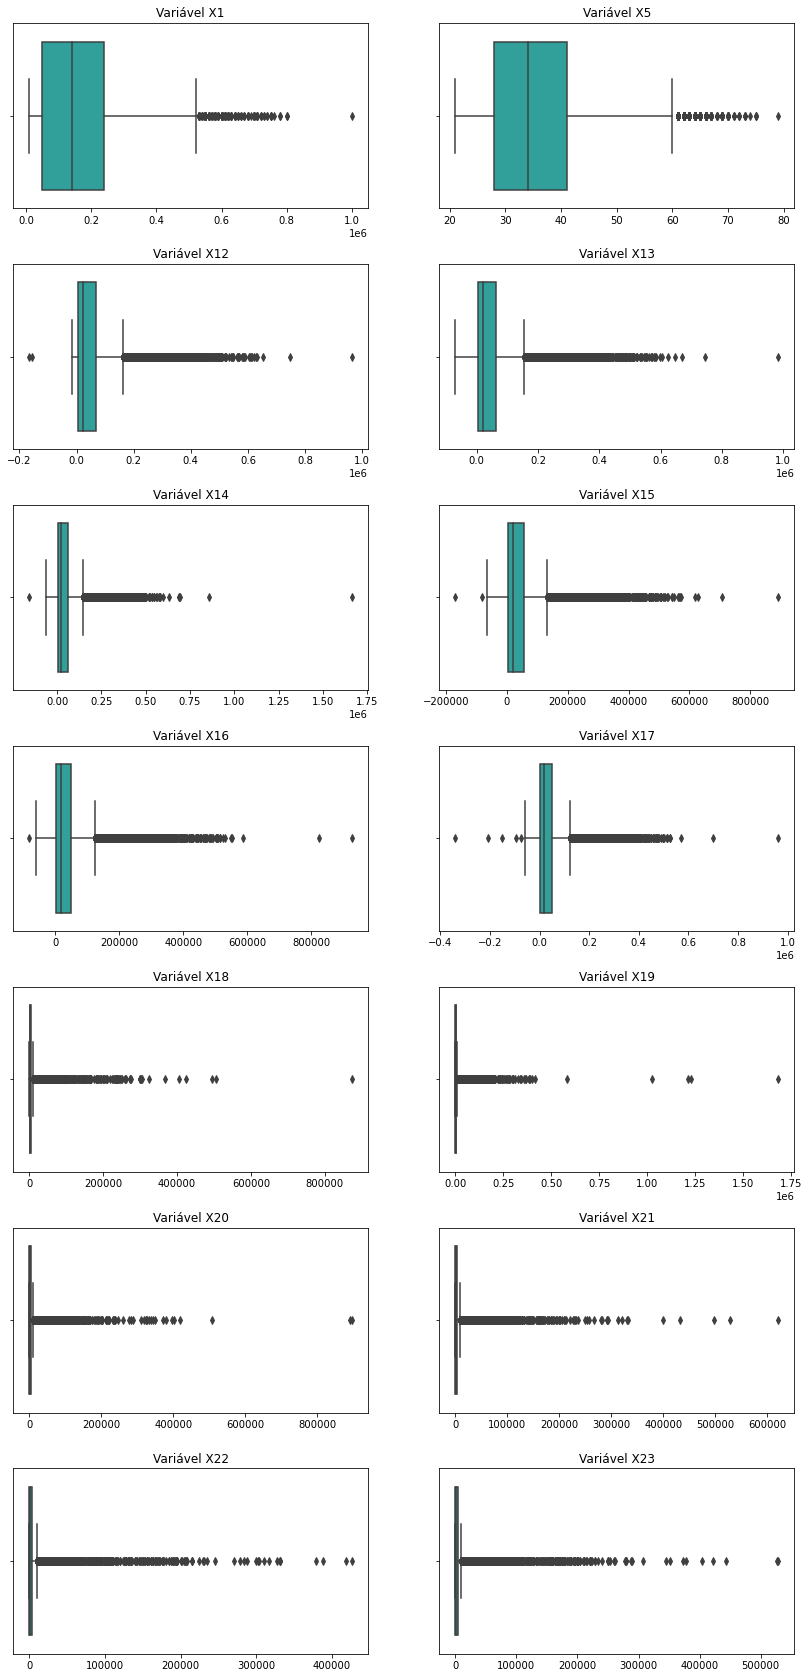

In [6]:
fig, axes = plt.subplots(7, 2, figsize=(14, 30))
plt.subplots_adjust(hspace= 0.3)

continuas = ['X1', 'X5', 'X12','X13','X14','X15','X16','X17','X18','X19','X20','X21','X22','X23']

h = 0
j = 0
while j < len(continuas)/2:

        sns.boxplot(ax=axes[j, 0], x = continuas[h], data = df, color='lightseagreen').set(title = f'Variável {continuas[h]}', xlabel = '')
        h += 1
        sns.boxplot(ax=axes[j, 1], x = continuas[h], data = df, color='lightseagreen').set(title = f'Variável {continuas[h]}', xlabel = '')
        h += 1
        j += 1

In [7]:
# Verificação de valores nulos

resultado = df.isnull().sum()
pd.DataFrame({'Variável': resultado.index, 'Qtd Valores Nulos': resultado.values})

,Variável,Qtd Valores Nulos
0,X1,0
1,X2,0
2,X3,0
3,X4,0
4,X5,0
5,X6,0
6,X7,0
7,X8,0
8,X9,0
9,X10,0


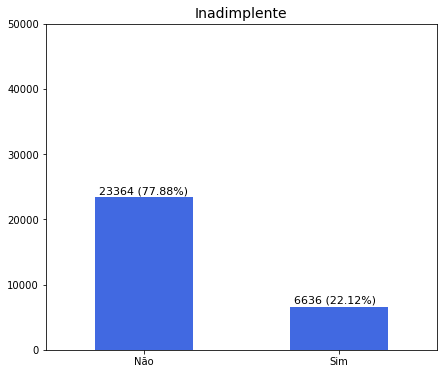

In [8]:
## Inadimplente
DF = df
variavel = 'Y'

plt.figure(figsize = (7,6))

resultado = DF[variavel].replace([0,1],['Não','Sim']).value_counts()#normalize=True)
porcentagem = list((DF[variavel].value_counts(normalize=True)*100).round(2).values)

resultado.plot.bar(color = 'royalblue')

for index, value in enumerate(list(resultado)):
    plt.text(index - 0.23, value + 500,  str(value) + " (" + str(porcentagem[index]) + '%)', fontsize = 11)

plt.title('Inadimplente', fontsize = 14)
plt.xticks(rotation = 0, horizontalalignment = 'center')
plt.ylim(0,50000)

# plt.savefig('AD_Inadimplente.png',bbox_inches='tight', dpi = 150)

plt.show()

* Verificação de Multicolinearidade

In [9]:
# Converter as colunas float em integer
for y in df.columns:
    if(df[y].dtype == np.float64):
        df[y] = df[y].astype(int)
df.dtypes.tail(5) # últimos tipos.

X20    int64
X21    int64
X22    int64
X23    int64
Y      int64
dtype: object

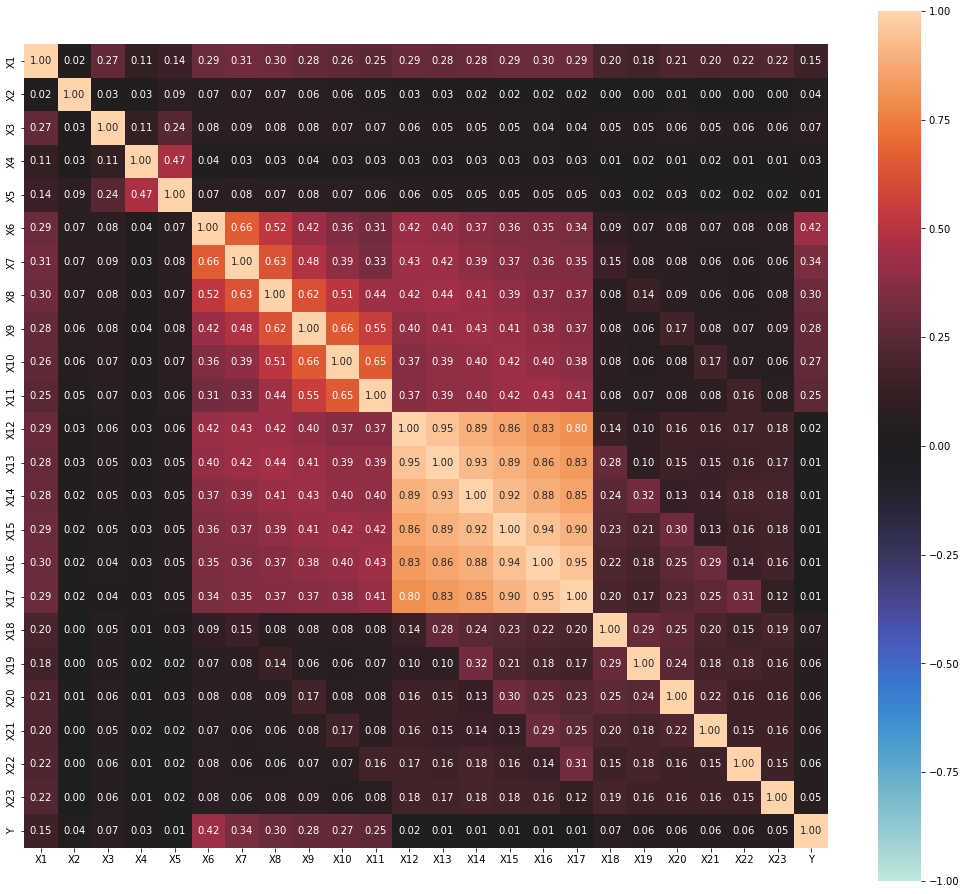

In [10]:
Data_Correlation = df.iloc[:, [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]]

from dython.nominal import associations

def associations_example():
    associations(Data_Correlation, nominal_columns= ['X2','X3','X4','X6','X7','X8','X9','X10','X11','Y'],figsize= (18,16))

associations_example()

**Engenharia de Atributos**

In [11]:
def padronizar(variavel, data):

    media = np.mean(data[variavel])
    desvio = np.std(data[variavel])

    return (data[variavel] - media)/desvio

for y in ['X1','X5','X12','X13','X14','X15','X16','X17','X18','X19','X20','X21','X22','X23']:
    df[y] = padronizar(y,df)

df.tail(5)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
29995,0.404759,1,3,1,0.381275,0,0,0,0,0,...,0.695474,-0.149259,-0.384392,0.171250,0.611048,-0.012648,-0.113564,0.013131,-0.237130,0
29996,-0.134759,1,3,2,0.815221,-1,-1,-1,-1,0,...,-0.532924,-0.577691,-0.652724,-0.231032,-0.103955,0.214255,-0.299828,-0.314136,-0.293382,0
29997,-1.059646,1,2,2,0.164303,4,3,2,-1,0,...,-0.347961,-0.324517,-0.327687,-0.341942,-0.256990,0.952725,-0.039964,-0.183229,-0.119001,1
29998,-0.674276,1,3,1,0.598248,1,-1,0,0,0,...,0.147844,-0.468063,0.169130,4.844316,-0.109033,-0.229895,-0.185120,3.152536,-0.191904,1
29999,-0.905498,1,2,1,1.140680,0,0,0,0,0,...,-0.104582,-0.129669,-0.395592,-0.216481,-0.178866,-0.215582,-0.244230,-0.248683,-0.237130,1


In [12]:
# Transformação de Dados Categoricas
df['Y'] = df['Y'].astype('category')
df['X2'] = df['X2'].astype('category')
df['X3'] = df['X3'].astype('category')
df['X4'] = df['X4'].astype('category')
df['X6'] = df['X6'].astype('category')
df['X7'] = df['X7'].astype('category')
df['X8'] = df['X8'].astype('category')
df['X9'] = df['X9'].astype('category')
df['X10'] = df['X10'].astype('category')
df['X11'] = df['X11'].astype('category')

**Preparação para modelagem**

In [13]:
# features que serão usadas
features = df[['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10','X11', 'X12','X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20','X21', 'X22', 'X23']]

features = pd.get_dummies(features)

target = df['Y']

X = features
Y = target

print(f'Porcentagem de valores de interesse: {np.round(((sum(target)/len(target))*100), 2)}%')

Porcentagem de valores de interesse: 22.12%


**Utilização de Modelos de Classificação**
* Treinamento e Teste

In [14]:
# Treinamento
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 5, stratify = Y)

# modelos de classificação que serão usados
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Criando o modelo - (trocar modelo)
Model_KN = KNeighborsClassifier()
Model_NB = BernoulliNB()
Model_LR = LogisticRegression()
Model_DT = DecisionTreeClassifier()
Model_RF = RandomForestClassifier()

# Treinando o modelo
Model_KN.fit(X_train, Y_train)
Model_NB.fit(X_train, Y_train)
Model_LR.fit(X_train, Y_train)
Model_DT.fit(X_train, Y_train)
Model_RF.fit(X_train, Y_train)

# Previsão do modelo
Predict_KN = Model_KN.predict(X_test)
Predict_NB = Model_NB.predict(X_test)
Predict_LR = Model_LR.predict(X_test)
Predict_DT = Model_DT.predict(X_test)
Predict_RF = Model_RF.predict(X_test)

# guardando objetos
modelos = [Model_KN, Model_NB, Model_LR, Model_DT, Model_RF]
predicao = [Predict_KN, Predict_NB, Predict_LR, Predict_DT, Predict_RF]
nome_modelos = ['Knn','Naive Bayes', 'Regressão Logística', 'Árvore de Decisão', 'Random Forest']

* Matriz de Confusão

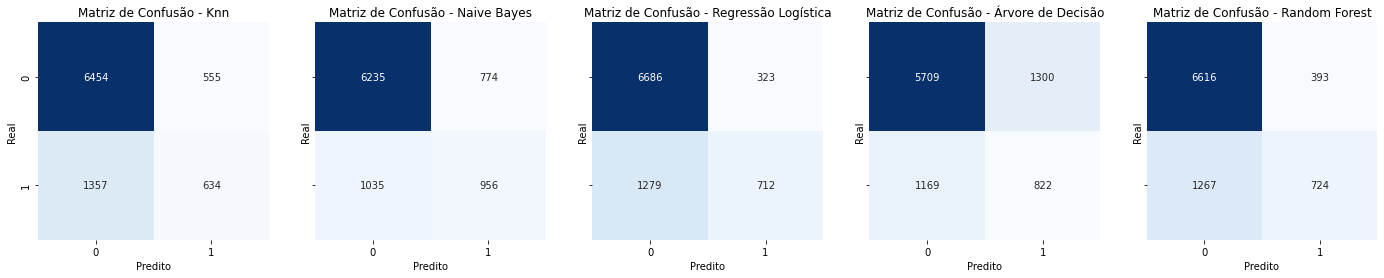

In [15]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics

fig, axes = plt.subplots(1, 5, figsize=(24, 4), sharey=True)
fig = plt.subplots_adjust(hspace = 0.3) 

# Gráfico para Matriz de confusão - K-NN
for i, pred in enumerate(predicao):
    
    matriz_confusao = confusion_matrix(Y_test, pred)

    ax1 = sns.heatmap(matriz_confusao , annot = True, fmt = "d", cmap = 'Blues', ax = axes[i], cbar=False)
    ax1.set_ylabel('Real')
    ax1.set_xlabel('Predito')
    ax1.set_title(f'Matriz de Confusão - {nome_modelos[i]}')

    #x_, y_, _ = metrics.roc_curve(Y_test, modelos[i].predict_proba(X_test)[:,1]) # Predict_KN

    #axes[i,1].plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    #axes[i,1].plot(x_, y_, color='blue', label= f'{nome_modelos[i]}')

    # plt.xlabel('Taxa de falso positivo')
    # plt.ylabel('Taxa de verdadeiro positivo')
    # plt.title('Curva ROC dos Modelos - RandomUnderSampler')
    # plt.legend()

plt.show()

* Métricas para Avaliação dos Modelos

In [16]:
# Métricas para avaliação do Modelo
from sklearn.metrics import log_loss, accuracy_score, f1_score, precision_score, recall_score, classification_report, cohen_kappa_score, roc_auc_score

# !pip install plotly
import plotly.figure_factory as ff

# Cálculo das Métricas
tabela = []

for i, pred in enumerate(predicao):
    tabela.append(  pd.DataFrame({'Modelo': [nome_modelos[i]],
                    'Acurácia': round(accuracy_score(Y_test, pred),4), 
                    'Precisão': round(f1_score(Y_test,pred),4), 
                    'Recall': round(precision_score(Y_test, pred),4), 
                    'F1': round(recall_score(Y_test, pred),4), 
                    'K': round(cohen_kappa_score(Y_test, pred),4),
                    'AUC' : round(roc_auc_score(Y_test, modelos[i].predict_proba(X_test)[:,1]),4)}))

fig = ff.create_table(pd.concat(tabela), height_constant=18)

fig.update_layout(width=950, height=200)

fig.show()

* Curva ROC

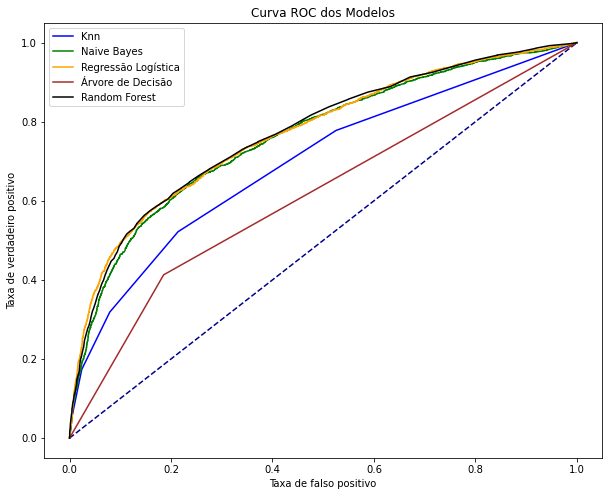

In [17]:
from sklearn import metrics

plt.figure(figsize = (8,6))

cores = ['blue','green','orange','brown','black'] 

plt.plot([0, 1], [0, 1], color= 'darkblue', linestyle='--')

for i in range(0,len(modelos)):

    x_, y_, _ = metrics.roc_curve(Y_test, modelos[i].predict_proba(X_test)[:,1])

    plt.plot(x_, y_, color = cores[i], label = f'{nome_modelos[i]}')


plt.xlabel('Taxa de falso positivo')
plt.ylabel('Taxa de verdadeiro positivo')
plt.title('Curva ROC dos Modelos')
plt.legend()

plt.show()

**Tratamento com reamostragem**

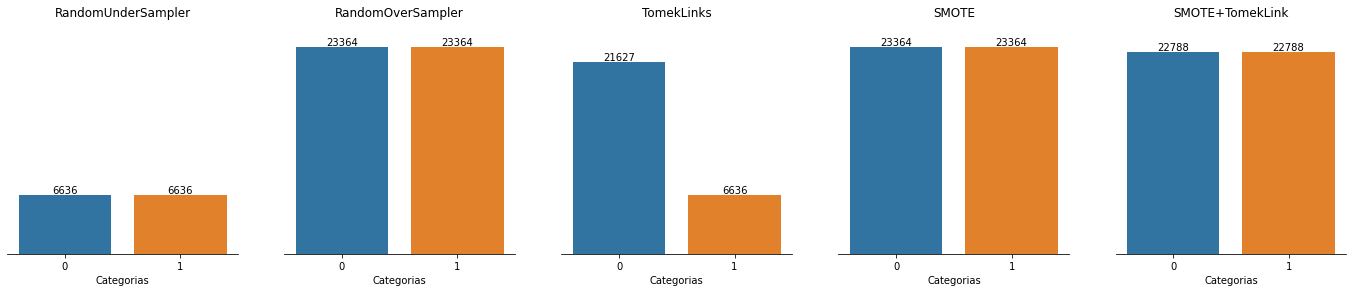

In [18]:
### pip install imbalanced-learn ### para instalar biblioteca

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

fig, axes = plt.subplots(1, 5, figsize=(24, 4), sharey=True)
fig = plt.subplots_adjust(hspace = 0.3) 

reamos = [RandomUnderSampler(random_state=32), RandomOverSampler(random_state=32), TomekLinks() , SMOTE(random_state = 32), SMOTETomek(random_state=32)]
nome_reamos = ['RandomUnderSampler','RandomOverSampler','TomekLinks','SMOTE', 'SMOTE+TomekLink']

reamostragem = [] 

for i in range(0,len(reamos)):

    reamostragem.append(reamos[i].fit_resample(X, Y))

    ax1 = sns.countplot(x = reamostragem[i][1], ax = axes[i], order = reamostragem[i][1].value_counts(sort = False).index)

    labels = reamostragem[i][1].value_counts(sort = False).values

    ax1.set_ylabel(' ')
    ax1.set_xlabel('Categorias')
    ax1.set_title(f'{nome_reamos[i]}', pad = 20)
    ax1.bar_label(container = ax1.containers[0], label = labels)
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    ax1.spines['left'].set_visible(False)
    ax1.get_yaxis().set_visible(False)

plt.show()

**Treinamento e Teste**

Reamostragem: RandomUnderSampler


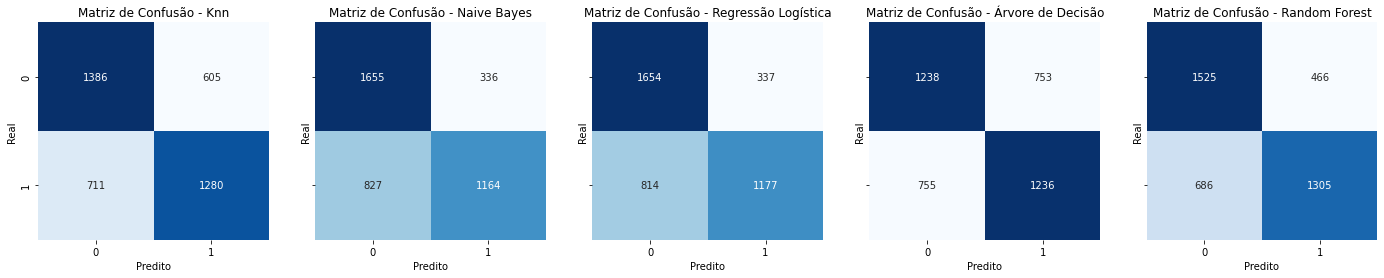

Reamostragem: RandomOverSampler


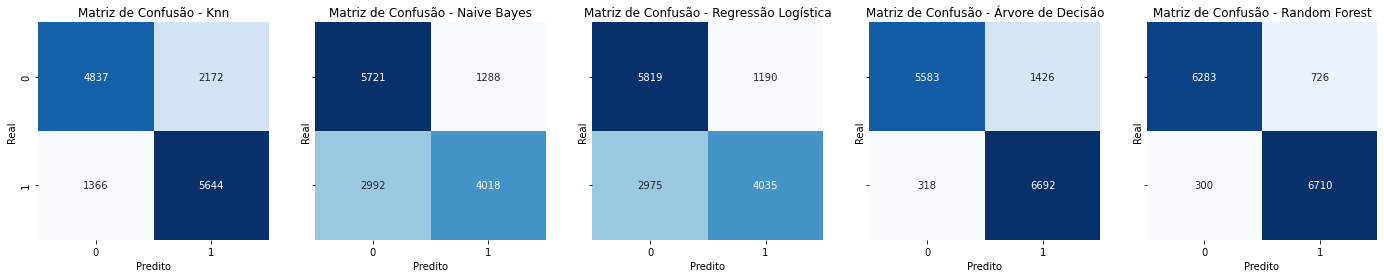

Reamostragem: TomekLinks


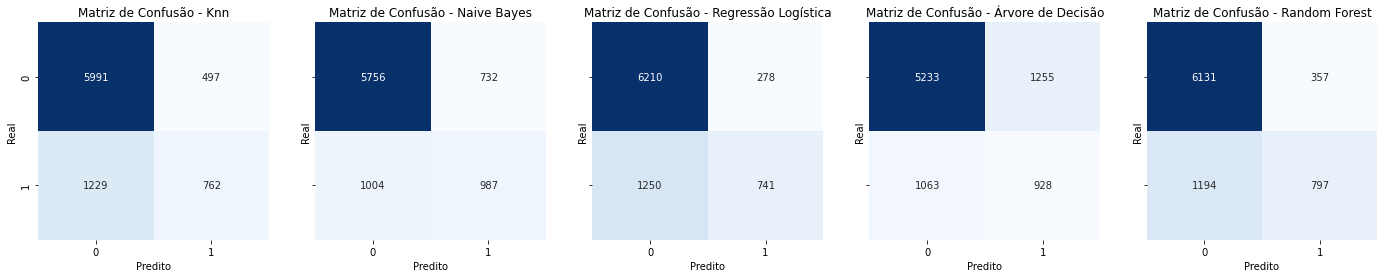

Reamostragem: SMOTE


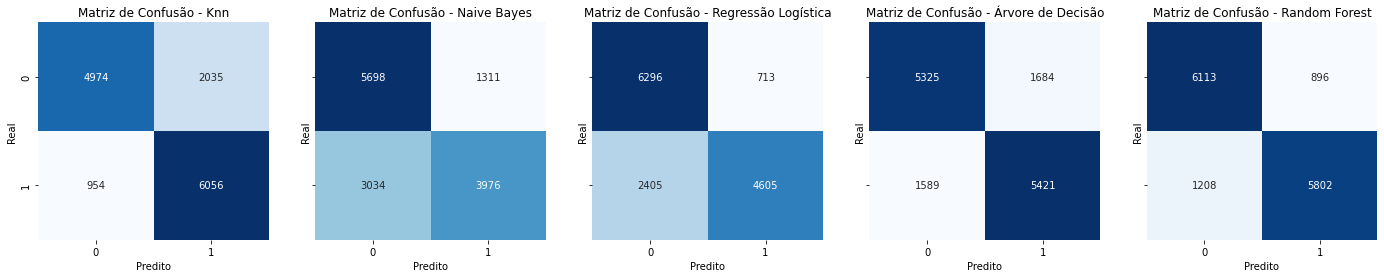

Reamostragem: SMOTE+TomekLink


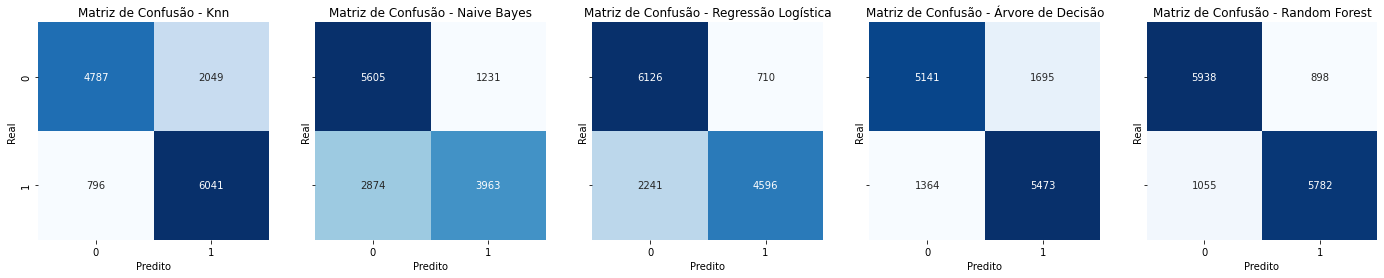

In [19]:
# Treinamento
from sklearn.model_selection import train_test_split

# modelo a ser usado 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Métricas para avaliação do Modelo
from sklearn.metrics import log_loss, accuracy_score, f1_score, precision_score, recall_score, classification_report, cohen_kappa_score, roc_auc_score

from sklearn import metrics

import plotly.figure_factory as ff

# Matrix de Confusão
from sklearn.metrics import confusion_matrix
from sklearn import metrics

tabela = []

for j in range(0,len(reamostragem)):

    X_ = reamostragem[j][0]
    Y_ = reamostragem[j][1]

    X_train, X_test, Y_train, Y_test = train_test_split(X_, Y_, test_size = 0.30, random_state = 5, stratify = Y_)

    # Criando o modelo - (trocar modelo)
    Model_KN = KNeighborsClassifier()
    Model_NB = BernoulliNB()
    Model_LR = LogisticRegression()
    Model_DT = DecisionTreeClassifier()
    Model_RF = RandomForestClassifier()

    # Treinando o modelo
    Model_KN.fit(X_train, Y_train)
    Model_NB.fit(X_train, Y_train)
    Model_LR.fit(X_train, Y_train)
    Model_DT.fit(X_train, Y_train)
    Model_RF.fit(X_train, Y_train)

    # Previsão do modelo
    Predict_KN = Model_KN.predict(X_test)
    Predict_NB = Model_NB.predict(X_test)
    Predict_LR = Model_LR.predict(X_test)
    Predict_DT = Model_DT.predict(X_test)
    Predict_RF = Model_RF.predict(X_test)

    # guardando objetos
    modelos = [Model_KN, Model_NB, Model_LR, Model_DT, Model_RF]
    predicao = [Predict_KN, Predict_NB, Predict_LR, Predict_DT, Predict_RF]
    nome_modelos = ['Knn','Naive Bayes', 'Regressão Logística', 'Árvore de Decisão', 'Random Forest']




    fig, axes = plt.subplots(1, 5, figsize=(24, 4), sharey=True)
    fig = plt.subplots_adjust(hspace = 0.3)

    # Cálculo das Métricas e Matriz de Confusão

    print(f'Reamostragem: {nome_reamos[j]}')

    for i, pred in enumerate(predicao):

        tabela.append(  pd.DataFrame({'Modelo': [nome_modelos[i]],
                        'Reamostragem': nome_reamos[j],
                        'Acurácia': round(accuracy_score(Y_test, pred),4), 
                        'Precisão': round(f1_score(Y_test,pred),4), 
                        'Recall': round(precision_score(Y_test, pred),4), 
                        'F1': round(recall_score(Y_test, pred),4), 
                        'K': round(cohen_kappa_score(Y_test, pred),4),
                        'AUC' : round(roc_auc_score(Y_test, modelos[i].predict_proba(X_test)[:,1]),4)}))

        matriz_confusao = confusion_matrix(Y_test, pred)

        ax1 = sns.heatmap(matriz_confusao, annot = True, fmt = "d", cmap = 'Blues', ax = axes[i], cbar=False)
        ax1.set_ylabel('Real')
        ax1.set_xlabel('Predito')
        ax1.set_title(f'Matriz de Confusão - {nome_modelos[i]}')

    plt.show()

    ## CURVA ROC 
    if j == 0:
        fig1, axes1 = plt.subplots(1, 5, figsize=(24, 4), sharey=True,frameon= False)
        #fig1 = plt.subplots_adjust(hspace = 0.3)
        cores = ['blue','green','orange','brown','black']

        plt.close('all') # não mostrar plot

    sns.lineplot([0, 1], [0, 1], color= 'darkblue', linestyle='--',ax = axes1[j])

    for i in range(0,len(modelos)):

        x_, y_, _ = metrics.roc_curve(Y_test, modelos[i].predict_proba(X_test)[:,1])

        ax2 = sns.lineplot(x_, y_, color = cores[i], label = f'{nome_modelos[i]}',ax = axes1[j])

    ax2.set_xlabel('Taxa de falso positivo')
    ax2.set_ylabel('Taxa de verdadeiro positivo')
    ax2.set_title(f'Curva ROC - {nome_reamos[j]}')
    ax2.legend()

    #if j == len(reamostragem)-1:
    #    fig1

Comparação das Curvas ROCs


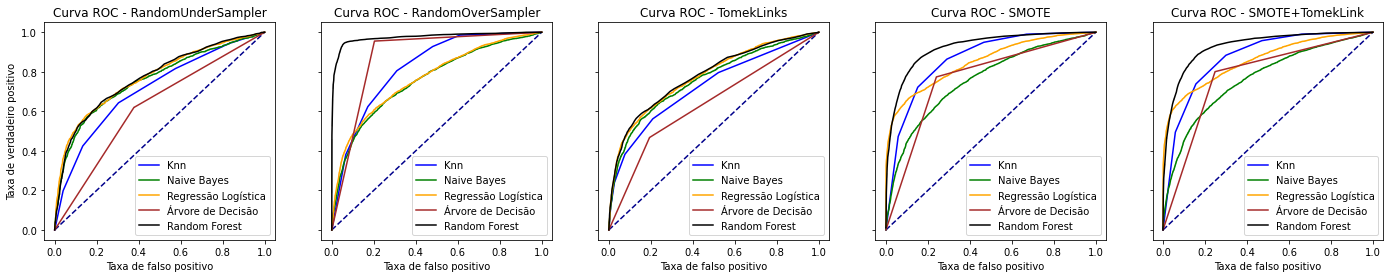

In [20]:
print('Comparação das Curvas ROCs')
fig1

In [22]:
print('Métricas para comparação dos Modelos de acordo com o tipo de reamostragem.')

fig = ff.create_table(pd.concat(tabela).sort_values(by = 'Modelo'), height_constant=18)

fig.update_layout(width=1200, height=750)

fig.show()

Métricas para comparação dos Modelos de acordo com o tipo de reamostragem.
